<center> <h1>Αναγνώριση Προτύπων - Προπαρασκευή 2ης Εργαστηριακής Άσκησης</h1> </center>

---

<center> <h2>Θέμα: Αναγνώριση φωνής με Κρυφά Μαρκοβιανά Μοντέλα και Αναδρομικά Νευρωνικά Δίκτυα</h2> </center>
<center> <h2>ΣΧΟΛΗ: ΣΗΜΜΥ</h2> </center>
<img src="pyrforos-digamma.png" width="100">

Ονοματεπώνυμο | Αριθμός Μητρώου
------------ | -------------
Γιάννης Πιτόσκας | 03115077
Αντώνης Παπαοικονόμου | 03115140

## Βήμα 1
Χρησιμοποιώντας το πρόγραμμα `Praat` για την ανάλυση των αρχείων ήχου έχουμε:

In [4]:
import subprocess
import os

data_path = os.path.dirname("./pr_lab2_2019-20_data/")

def usePraat(file, text):
    try:
        subprocess.call(["/Applications/Praat.app/Contents/MacOS/Praat", "--open", file])
    except OSError as e:
        if e.errno == errno.ENOENT:
            # handle file not found error
            print("Please download Praat and use the installation path when calling it")
        else:
            # Something else went wrong while trying to run
            print("An error occured")
            raise
            
# usePraat(data_path + "/onetwothree1.wav", "one two three")
# usePraat(data_path + "/onetwothree8.wav", "one two three")

<img src="pitch_mean_onetwothree1.png">
<img src="pitch_mean_onetwothree8.png">
<img src="formants_onetwothree1.png">
<img src="formants_onetwothree8.png">

999.7624910757692 Hz (mean F1 in SELECTION)<br>
2568.2020920385485 Hz (mean F2 in SELECTION)<br>
3763.962970328683 Hz (mean F3 in SELECTION)<br>
<br>
1522.7387179790562 Hz (mean F1 in SELECTION)<br>
2958.5714711553173 Hz (mean F2 in SELECTION)<br>
3924.813236998355 Hz (mean F3 in SELECTION)<br>
<br>
1564.9136738911895 Hz (mean F1 in SELECTION)<br>
3106.0191007879434 Hz (mean F2 in SELECTION)<br>
3908.220816228914 Hz (mean F3 in SELECTION)<br>
<br>
<br>
579.574899251275 Hz (mean F1 in SELECTION)<br>
1806.3230037579995 Hz (mean F2 in SELECTION)<br>
2847.797227900949 Hz (mean F3 in SELECTION)<br>
<br>
530.4466184919183 Hz (mean F1 in SELECTION)<br>
1786.186919057703 Hz (mean F2 in SELECTION)<br>
2801.8758790729344 Hz (mean F3 in SELECTION)<br>
<br>
494.06899004212613 Hz (mean F1 in SELECTION)<br>
2096.0501422577026 Hz (mean F2 in SELECTION)<br>
2775.4912341476625 Hz (mean F3 in SELECTION)<br>

## Βήμα 2
Εκτός από τις 3 λίστες της εκφώνησης (αρχεία ήχου, ομιλιτές και τα ψηφία) θα χρειαστούμε και το sample rate

In [90]:
import os
import re
import librosa

digits_dir = data_path + "/digits/"

def dataLoader(path):
    wavs = []
    speakers = []
    digits = []

    for filename in os.listdir(path):
        if filename.endswith(".wav"):
            
            wav, sr = librosa.load(os.path.join(path, filename))
            wavs.append(wav)
            
            # split characters from numbers
            file = re.split('(\d+)',filename)
            speakers.append(int(file[1]))
            digits.append(file[0])
    
    return wavs, speakers, digits, sr

wavs, speakers, digits, sr = dataLoader(digits_dir)

## Βήμα 3
Για τα `Mel-Frequency Cepstral Coefficients` έχουμε:

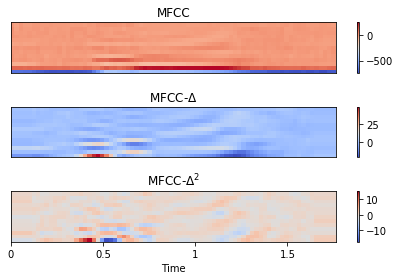

In [38]:
import matplotlib.pyplot as plt
import librosa.display

mfccs = []

for wav in wavs:
    mfcc = librosa.feature.mfcc(y=wav, n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
    mfcc_delta = librosa.feature.delta(mfcc, order=1)
    mfcc_delta_delta = librosa.feature.delta(mfcc, order=2)
    mfccs.append(mfcc)
    
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc)
plt.title('MFCC')
plt.colorbar()
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_delta)
plt.title(r'MFCC-$\Delta$')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_delta_delta, x_axis='time')
plt.title(r'MFCC-$\Delta^2$')
plt.colorbar()
plt.tight_layout()
plt.show()

## Βήμα 4
Για $n_1 = 4$, $n_2 = 3$ έχουμε:

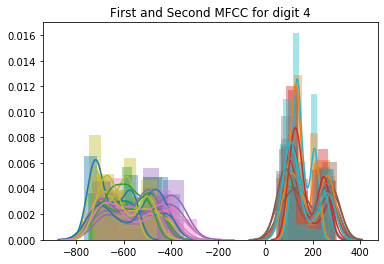

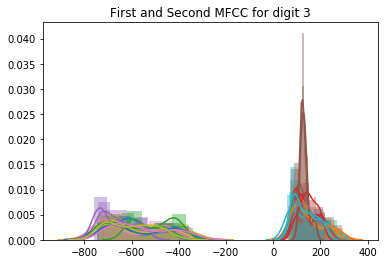

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import inflect

n1 = 4
n2 = 3
s1 = inflect.engine().number_to_words(n1)
s2 = inflect.engine().number_to_words(n2)

for index in range(len(wavs)):
    if digits[index] == s1:
        ax = sns.distplot(mfccs[index][0])
        bx = sns.distplot(mfccs[index][1])
plt.title("First and Second MFCC for digit " + str(n1))
plt.show()

for index in range(len(wavs)):
    if digits[index] == s2:
        ax = sns.distplot(mfccs[index][0])
        bx = sns.distplot(mfccs[index][1])
plt.title("First and Second MFCC for digit " + str(n2))
plt.show()

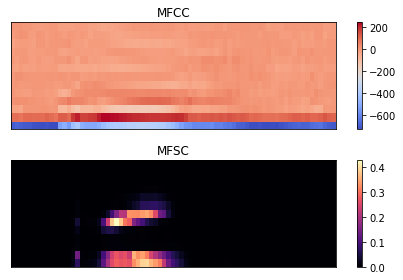

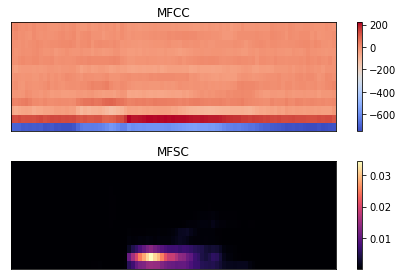

In [92]:
import librosa.display
import random

rand_sp_1 = random.randint(1, len(set(speakers)))
rand_sp_2 = random.randint(1, len(set(speakers)))
while(rand_sp_2 == rand_sp_1):
    rand_sp_2 = random.randint(1, len(set(speakers)))

for index in range(len(wavs)):
    if speakers[index] == rand_sp_1:
        if digits[index] == s1:
            mfcc = librosa.feature.mfcc(y=wavs[index], n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            mfsc = librosa.feature.melspectrogram(y=wavs[index], n_mels=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            plt.subplot(2, 1, 1)
            librosa.display.specshow(mfcc)
            plt.title('MFCC')
            plt.colorbar()
            plt.subplot(2, 1, 2)
            librosa.display.specshow(mfsc)
            plt.title('MFSC')
            plt.colorbar()
            plt.tight_layout()
            plt.show()

    if speakers[index] == rand_sp_2:
        if digits[index] == s2:
            mfcc = librosa.feature.mfcc(y=wavs[index], n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            mfsc = librosa.feature.melspectrogram(y=wavs[index], n_mels=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            plt.subplot(2, 1, 1)
            librosa.display.specshow(mfcc)
            plt.title('MFCC')
            plt.colorbar()
            plt.subplot(2, 1, 2)
            librosa.display.specshow(mfsc)
            plt.title('MFSC')
            plt.colorbar()
            plt.tight_layout()
            plt.show()

## Βήμα 6

Τυπώνοντας τις τιμές για τα πρώτα 4 features έχουμε:

## Βήμα 7

## Βήμα 8

## Βήμα 9
Τυπώνοντας μόνο το την τιμή για το πρώτο feature έχουμε:

## Βήμα 10
Σύμφωνα με τον τύπο $pred(X) = \arg\min_{0 \leq i \leq 9} \| \mu - X \|_2$ έχουμε:

## Βήμα 11
Βρίσκοντας την ελάχιστη Ευκλείδεια απόσταση και συγκρίνοντας την με τo label y για κάθε δείγμα στο test set μας έχουμε:


## Βήμα 13
**(α)**

**(γ)** Για όλα μας τα δεδομένα (test και train μαζί) και χρησιμοποιώντας 5-fold cross-validation έχουμε τις παρακάτω καμπύλες εκμάθησης (learning curves):